# Health and Environmental Issues Caused by PM 2.5 in California



## Scope / Abstract of the Project:

The following notebook is designed to show how particle matter 2.5 has had an adverse effect on health-related issues. There are several factors which have contributed to the rise of particle matter 2.5 such as the growth of wildfires. Other factors include the emissions from gasoline, oil, diesel and also wood, which is why the particle matter 2.5 rates have been higher over the recent years especially in dry climates. Particle Matter 2.5 has direct health issues related to the topic as well, which is what we are attempting to prove within this notebook and analysis. Our goal is to show that there has been an increase of Asthma related attacks and an overall increase of Asthma diagnosis in the Los Angeles area as they are one of the 5 areas with the highest particle matter 2.5 rating. “For PM2.5, short-term exposures (up to 24-hours duration) have been associated with premature mortality, increased hospital admissions for heart or lung causes, acute and chronic bronchitis, asthma attacks, emergency room visits, respiratory symptoms, and restricted activity days. These adverse health effects have been reported primarily in infants, children, and older adults with preexisting heart or lung diseases. In addition, of all of the common air pollutants, PM2.5 is associated with the greatest proportion of adverse health effects related to air pollution, both in the United States and world-wide based on the World Health Organization’s” (California Air Resources Board, n.d., para. 5). Let this fact sink in there and then think about it, the World needs to change and make changes that can have a positive outlook on the development of the World and also take care of the people who have a chance to make a difference, the youth, and the population that give this nation the ability to continue to grow.

### Crisp DM Model

Project Understanding: The goal of this project is to attempt to show how PM 2.5 is affecting the health and lives of the general population in terms of their respiratory and to show the lack of resources with the communities to combat the spread.

Data Understanding:In the aspect of this project, out goal was to bring in CSV style datasets, although we were unable to find the exact data that we were initally looking for we were able to discover datasets that included the whole state of CA, instead of local county datasets. Thus, in otder to understand what we had, it was easier to upload the tables into notebook, and the run queries to clean the tables to display the information that we are looking for and can show the datasets that are involved within the project topic.

Data Preparation: In order to organize the datasets, we decided to create geodatabases with ArcGIS Pro, and then bring in the geodatabases into notebooks for better organization. Selecting the datasets, within the dataset that we are need to be used, integrating the datasets, by joing tables.

Modeling: In this stage we decided to use interpolation techniques to combine the layers that we used. Bringing in each layer combing them to build different models, while also learning how different modeling techniques work. We also decided to play around and use different techniques to try and create additional demonstrations but ran out of time.

Evaluation: The work that was created overall, was to demonstrate that areas that have a higher PM 2.5 rating above 12 or near that number have contributed to the increase of health issues within the general population, but primarly the children and elderly population due to thier lack of a developed system.

Deployment: is demonstrated through the analysis maps and the final output map that demonstrates the lack of hospitals, and the increase in cases of Asthma within Los Angeles and San Bernardino.

## Code Requirements:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")
from arcgis.features.analyze_patterns import interpolate_points

In [2]:
! pip install geopandas

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     |████████████████████████████████| 1.1 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.7 MB 57.1 MB/s eta 0:00:01


In [3]:
! pip install folium

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     |████████████████████████████████| 96 kB 4.4 MB/s eta 0:00:011


In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import os
import seaborn as sns

In [5]:
import os
import zipfile
import arcpy

In [6]:
#Let’s visualize it on a map
import pandas as pd
from arcgis.features import GeoAccessor

In [7]:
%matplotlib inline
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from IPython.display import display
from arcgis.features.analyze_patterns import calculate_density, find_hot_spots
from arcgis.mapping.symbol import create_symbol
from arcgis.features.use_proximity import create_drive_time_areas
from arcgis.features.summarize_data import summarize_within
import arcpy
from arcgis.features import analysis
from arcgis.features.analyze_patterns import calculate_density, find_hot_spots
import arcgis.network as network

In [9]:
#Let’s import the analysis tools
from arcgis.features import analysis

#### Analysis Questions

Is there a relation between PM 2.5 and respiratory issues in the general population?

Has there been an increase in Asthma cases in areas that have a higher concentraction of PM 2.5?

## Create a Geodatabase to store all data:

## I. PM2_5 DIR:

In [10]:
# Examine the directory structure
os.listdir('/arcgis/home/California_Health')

['PM2_5']

In [11]:
# Create a placeholder folder for the datasets
try:
    dir_name = ('/arcgis/home/California_Health')
    os.mkdir(dir_name)
except Exception as exception:
    print (f"{dir_name} already exists.")

/arcgis/home/California_Health already exists.


In [12]:
#Create a Directory to store our geodatabase
home_dir = '/arcgis/home/California_Health'
new_dirname = 'PM2_5'
lesson_dir = os.path.join(home_dir, new_dirname)

## 1. PM PREDICTION GDB

In [13]:
dataset = '/arcgis/home/California_Project/California.gdb.zip'

In [14]:
#Unzipping the geodatabase
zip_ref = zipfile.ZipFile(dataset, 'r')
zip_ref.extractall(lesson_dir)

In [15]:
#Checking our workspace
print(arcpy.env.workspace)

None


In [16]:
#Assign the geodatabase to PMPREDICTION
PM2_DROUGHT = os.path.join(lesson_dir, 'California.gdb')

In [17]:
#Assign new workspace
arcpy.env.workspace = PM2_DROUGHT

In [18]:
print(arcpy.env.workspace)

/arcgis/home/California_Health/PM2_5/California.gdb


In [19]:
#List feature classes in geodatabase
arcpy.ListFeatureClasses()

['Places_over_Federal_Standard',
 'Places_Over_Federal_Standard_Muneeer',
 'Places_Over_CA_Standards_Muneer_Mogni',
 'PM_Prediction_Muneer_Mogni',
 'PM_Prediction_Muneer_Mogni___predictionError',
 'Nearest_Monitoring_Sites_to_Populated_Places_Muneer_Mo',
 'Nearest_Monitoring_Sites_to_Populated_Places_Muneer_Mo___Connecting_Lines',
 'Monitoring_Stations_within_Populated_Places_Muneer',
 'Monitoring_Stations_within_Populated_Places_Muneer_1',
 'Monitoring_Stations_within_Populated_Places_Muneer_Mogni',
 'Annual_PM2_5_Monitoring_Sites',
 'Populated_Places',
 'California']

In [20]:
#Create a new geodatabase to store results
gp_res = arcpy.management.CreateFileGDB(lesson_dir, 'results_california_health_10.gdb')


In [21]:
gp_res

<Result '/arcgis/home/California_Health/PM2_5/results_california_health_10.gdb'>

In [22]:
print(arcpy.env.workspace)

/arcgis/home/California_Health/PM2_5/California.gdb


In [23]:
#change workspace to the new geodatabase
arcpy.env.workspace = gp_res[0]
print(arcpy.env.workspace)

/arcgis/home/California_Health/PM2_5/results_california_health_10.gdb


## 2. FIRE HAZARD

In [24]:
dataset3 = '/arcgis/home/California_Project/kx-los-angeles-county-fire-hazard-severity-zones-FGDB.zip'

In [25]:
#Unzipping the geodatabase
zip_ref = zipfile.ZipFile(dataset3, 'r')
zip_ref.extractall(lesson_dir)

In [26]:
#Checking our workspace
print(arcpy.env.workspace)

/arcgis/home/California_Health/PM2_5/results_california_health_10.gdb


In [27]:
#Assign the geodatabase to PMPREDICTION
cal_fire = os.path.join(lesson_dir, 'los-angeles-county-fire-hazard-severity-zones.gdb')

In [28]:
arcpy.env.workspace = cal_fire

In [29]:
print(arcpy.env.workspace)

/arcgis/home/California_Health/PM2_5/los-angeles-county-fire-hazard-severity-zones.gdb


In [30]:
#List feature classes in geodatabase
arcpy.ListFeatureClasses()

['Los_Angeles_County_Fire_Hazard_Severity_Zones']

In [31]:
#Create a new geodatabase to store results
gp_res = arcpy.management.CreateFileGDB(lesson_dir, 'fire_7.gdb')


In [32]:
gp_res

<Result '/arcgis/home/California_Health/PM2_5/fire_7.gdb'>

In [33]:
print(arcpy.env.workspace)

/arcgis/home/California_Health/PM2_5/los-angeles-county-fire-hazard-severity-zones.gdb


In [34]:
arcpy.env.workspace = gp_res[0]
print(arcpy.env.workspace)

/arcgis/home/California_Health/PM2_5/fire_7.gdb


## 3. ASTHAMA CAL

In [35]:
dataset4 = '/arcgis/home/California_Project/asthma_cal.gdb.zip'

In [36]:
#Unzipping the geodatabase
zip_ref = zipfile.ZipFile(dataset4, 'r')
zip_ref.extractall(lesson_dir)

In [37]:
#Checking our workspace
print(arcpy.env.workspace)

/arcgis/home/California_Health/PM2_5/fire_7.gdb


In [38]:
#Assign the geodatabase to crimedc
calenviro = os.path.join(lesson_dir, 'asthma_cal.gdb')

In [39]:
#Assign new workspace
arcpy.env.workspace = calenviro

In [40]:
print(arcpy.env.workspace)

/arcgis/home/California_Health/PM2_5/asthma_cal.gdb


In [41]:
#List feature classes in geodatabase
arcpy.ListFeatureClasses()

['asthma_cal']

In [43]:
#Create a new geodatabase to store results
gp_res = arcpy.management.CreateFileGDB(lesson_dir, 'results_asthma_cal_4.gdb')


In [44]:
gp_res

<Result '/arcgis/home/California_Health/PM2_5/results_asthma_cal_4.gdb'>

In [45]:
print(arcpy.env.workspace)

/arcgis/home/California_Health/PM2_5/asthma_cal.gdb


In [46]:
#change workspace to the new geodatabase
arcpy.env.workspace = gp_res[0]
print(arcpy.env.workspace)

/arcgis/home/California_Health/PM2_5/results_asthma_cal_4.gdb


## Literature Review

Particle Matter otherwise known as (PM 2.5) has several associations with health problems, for example asthma being on the leading respiratory issues. According to a journal published by Kornnasa Chankaew, a study that was conducted in Thailand about how sensitive children with asthmatic symptoms are to levels of PM 2.5 levels above 12 mcg/m^3. The study shows that exposure to high daily PM 2.5 levels can lead to asthma exacerbation within a three-day period. Yes, this study was conducted in Thailand where, PM 2.5 levels are high, but the average level of 12 mcg/m^3 is very common within the United States as well. When examing Asthma, for example the percent of adults who currently have Asthma on a national level is roughly 7%, but California counts for 7.8% of the total population of adults who have Asthma. On a national average for children who currently have Asthma the national level is 8.3%, while California counts for 7.3% (CDC & Prevention, n.d.). According to the CDC & Prevention the annual ambient concentration of PM 2.5 is 14.7ug/m^3, while Los Angeles County is at 12.0 ug/m^3; which makes them the same level as the study that was conducted in Thailand, thus there is enough evidence to suggest that PM 2.5 is one of the leading causes to cause asthmatic symptoms in children. According to the results founded by Kornnasa Chankaew severe asthma was found in more than half of the participants(Chankaew, 2022).

According to the journal, US particulate matter air quality improves except in wildfire-prone areas; "wildfires are a major source of fine particulate matter (diameter <2.5 um; PM2.5), which is a health hazard. Since the mid-1980's, the total US area burned by wildfires has been increasing, with fires in the Northwest United States accounting for a 50-60% of that total increase" (McClure, 2018). As we do know, wildfires have been growing increasingly over the past couple of decades especially up and down the coast of California and surrounding states, which in return have generated an increase in the particle matter (PM 2.5). "Across 112 cities, California averaged a PM 2.5 concentration of 12.1 ug/m^3 (moderate) in the year of 2018. Only 35.7 percent of the cities met the World Health Organization target for annual PM 2.5 exposure of 10 ug/m^3, as compared to the national average of 81.7 percent" (California Air Quality index, last updated Dec 4, 2022). The top five worst cities in the country with annual PM 2.5 ratings are the following and all located in California: Bakersfield, Fresno, Visalia, Los Angeles and the Bay Area. California has such bad air quality due to emissions, demand for energy production through fossil fuels and household energy consumption as well as the wildfires.




## DATA  FILTERATION AND STUDY AREA:

### 1. POPULATION DATA

In [47]:
Populated_Places_sdf = pd.DataFrame.spatial.from_featureclass(os.path.join(PM2_DROUGHT,'Populated_Places'))

In [48]:
#plots the data to the map view
map_view = Populated_Places_sdf.spatial.plot(alpha=0.10)
map_view

MapView(layout=Layout(height='400px', width='100%'))

In [49]:
population_df = Populated_Places_sdf.head(1000)
population_df

,OBJECTID,GEOID,NAME,Population,Males,Females,Children,Elderly,MeanHHIncome,MeanError,TotalHHs,HHsError,AreaSqMiles,AreaSqKm,SHAPE
0,1,0673108,South Lake Tahoe,21034,11105,9929,3617,2043,55424,4073,8497,360,16.615255,43.033314,"{""rings"": [[[245239.27940000035, 4316194.14540..."
1,2,0657540,Placerville,9788,4596,5192,1863,1629,63441,5715,3893,269,5.823516,15.082839,"{""rings"": [[[166569.64769999962, 4292303.72089..."
2,3,0683668,Watsonville,50671,25196,25475,13441,4030,58345,3512,13754,436,6.808626,17.634260,"{""rings"": [[[73232.70469999965, 4093371.532199..."
3,4,0670588,Scotts Valley,11308,5522,5786,2312,1575,116495,6874,4318,215,4.636924,12.009578,"{""rings"": [[[51922.15529999975, 4112331.9945],..."
4,5,0669112,Santa Cruz,51657,25706,25951,6738,5215,82930,3301,21425,581,13.010564,33.697205,"{""rings"": [[[48237.302699999884, 4101330.36539..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,0663316,Running Springs,4862,2496,2366,900,539,66757,7520,1927,229,4.209738,10.903172,"{""rings"": [[[489996.76410000026, 3787242.8236]..."
925,926,0664462,San Antonio Heights,3358,1686,1672,542,568,157934,23374,1258,79,2.616188,6.775895,"{""rings"": [[[441543.9840000002, 3780627.910499..."
926,927,0670728,Searles Valley,1739,887,852,370,275,49712,9630,754,103,10.486084,27.158833,"{""rings"": [[[466014.57349999994, 3961293.44700..."
927,928,0686594,Wrightwood,4525,2323,2202,843,611,79808,10095,1891,200,5.924958,15.345571,"{""rings"": [[[440174.0828999998, 3803647.0954],..."


In [50]:
# Exploring the dataset attributs
population_df.columns

Index(['OBJECTID', 'GEOID', 'NAME', 'Population', 'Males', 'Females',
       'Children', 'Elderly', 'MeanHHIncome', 'MeanError', 'TotalHHs',
       'HHsError', 'AreaSqMiles', 'AreaSqKm', 'SHAPE'],
      dtype='object')

In [51]:
population_df_Filtered_df = population_df.query("NAME == 'Los Angeles' | NAME == 'San Bernardino'")
population_df_Filtered_df

,OBJECTID,GEOID,NAME,Population,Males,Females,Children,Elderly,MeanHHIncome,MeanError,TotalHHs,HHsError,AreaSqMiles,AreaSqKm,SHAPE
367,368,0644000,Los Angeles,3708020,1840055,1867965,718406,382843,77660,580,1317663,3927,477.714935,1237.276001,"{""rings"": [[[385946.0290000001, 3792464.7247],..."
454,455,0665000,San Bernardino,202599,98624,103975,55357,15791,51041,1222,59133,1024,61.892746,160.301468,"{""rings"": [[[484790.52830000035, 3777936.52329..."


In [52]:
population_df_Filtered_df[['NAME', 'Population','Children','Elderly', 'AreaSqMiles', 'SHAPE',]]

,NAME,Population,Children,Elderly,AreaSqMiles,SHAPE
367,Los Angeles,3708020,718406,382843,477.714935,"{""rings"": [[[385946.0290000001, 3792464.7247],..."
454,San Bernardino,202599,55357,15791,61.892746,"{""rings"": [[[484790.52830000035, 3777936.52329..."


In [53]:
population_df_FilteredLayer = population_df_Filtered_df.spatial.to_featurelayer(title='population',tags=['population'])
population_df_FilteredLayer

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<Item title:"population" type:Feature Layer Collection owner:david.marcucci>

In [54]:
map_view_2 = population_df_Filtered_df.spatial.plot(alpha=0.10)
map_view_2

MapView(layout=Layout(height='400px', width='100%'))

### 2. ANNUAL AVERAGE PM 2.5 PARTICLES

In [55]:
Annual_pm2_5_sdf = pd.DataFrame.spatial.from_featureclass(os.path.join(PM2_DROUGHT,'Annual_PM2_5_Monitoring_Sites'))

In [56]:
Annual_pm2_5_df = Annual_pm2_5_sdf.head(1000)
Annual_pm2_5_df

,OBJECTID,OBSERVATIONS,LOCATION,ADDRESS,CITY,COUNTY,YEARLYAVG,MAX_,AVG_AQI,SHAPE
0,1,101,Chula Vista,"80 E. 'J' ST., CHULA VISTA",Chula Vista,San Diego,9.5911,22.7,38.6139,"{""x"": 494458.6166000003, ""y"": 3610407.92469999..."
1,2,195,CALEXICO HIGH SCHOOL ARB (#1300698),"1029 ETHEL ST, CALEXICO HIGH SCHOOL",Calexico,Imperial,12.9195,50.9,48.1744,"{""x"": 642126.9216999998, ""y"": 3616405.01810000..."
2,3,320,San Diego - Downtown,"1110 BEARDSLEY STREET, SAN DIEGO, CA 92112",San Diego,San Diego,10.4284,29.7,41.3875,"{""x"": 485973.14740000013, ""y"": 3618205.0065, ""..."
3,4,73,La Posta Reservation,"8 1/2 Crestwood Road, Boulevard, CA 91905",Boulevard,San Diego,4.9562,114.0,16.6849,"{""x"": 559483.7282999996, ""y"": 3621004.2884, ""s..."
4,5,116,El Cajon,"1155 REDWOOD AVE., EL CAJON",El Cajon,San Diego,10.8353,27.7,42.9655,"{""x"": 505422.23060000036, ""y"": 3628140.5621000..."
...,...,...,...,...,...,...,...,...,...,...
93,94,7632,RED BLUFF-310 S. MAIN STREET,"310 S. MAIN STREET, RED BLUFF, CA 96080",Red Bluff,Tehama,11.1148,94.0,43.6213,"{""x"": 54802.732599999756, ""y"": 4459500.6574000..."
94,95,56,Redding - Health Dept,"HLTH CTR-2630 HOSPITAL LN, REDDING",Redding,Shasta,4.6304,10.7,19.3571,"{""x"": 44341.43960000016, ""y"": 4502688.3136, ""s..."
95,96,87,EUREKA-JACOBS,717 SOUTH AVENUE,Eureka,Humboldt,5.9839,21.6,24.3218,"{""x"": -105902.0691999998, ""y"": 4538852.9030000..."
96,97,89,Eureka I Street,"I STREET, EUREKA",Eureka,Humboldt,5.8247,21.8,23.8315,"{""x"": -104374.48739999998, ""y"": 4541506.0704, ..."


In [57]:
# Exploring the dataset attributs
Annual_pm2_5_df.columns

Index(['OBJECTID', 'OBSERVATIONS', 'LOCATION', 'ADDRESS', 'CITY', 'COUNTY',
       'YEARLYAVG', 'MAX_', 'AVG_AQI', 'SHAPE'],
      dtype='object')

In [58]:
Annual_pm2_5_df_df_Filtered_df = Annual_pm2_5_df.query("COUNTY == 'Los Angeles' | COUNTY == 'San Bernardino'")
Annual_pm2_5_df_df_Filtered_df

,OBJECTID,OBSERVATIONS,LOCATION,ADDRESS,CITY,COUNTY,YEARLYAVG,MAX_,AVG_AQI,SHAPE
14,15,351,,"1305 E. PACIFIC COAST HWY., LONG BEACH",Long Beach,Los Angeles,10.3664,33.7,40.9345,"{""x"": 391194.5108000003, ""y"": 3739754.40059999..."
15,16,9105,Long Beach (North),"3648 N. LONG BEACH BLVD., LONG BEACH",Long Beach,Los Angeles,11.3943,94.3,43.3488,"{""x"": 389949.7229000004, ""y"": 3743250.8992, ""s..."
18,19,111,Compton,700 North Bullis Road,Compton,Los Angeles,12.5036,38.2,47.3874,"{""x"": 388589.31159999967, ""y"": 3751875.7814000..."
22,23,117,Pico Rivera #2,"4144 SAN GABRIEL RIVER PKWY, PICO RIVERA",Pico Rivera,Los Angeles,12.4957,34.9,47.6154,"{""x"": 401204.0968000004, ""y"": 3763995.89340000..."
23,24,112,Ontario Fire Station,1408 FRANCIS ST.,Ontario,San Bernardino,13.0196,46.1,49.5536,"{""x"": 436307.2224000003, ""y"": 3766497.7653, ""s..."
24,25,9048,Los Angeles (Main St.),"1630 N MAIN ST, LOS ANGELES",Los Angeles,Los Angeles,15.3741,95.0,52.5699,"{""x"": 386785.5275999997, ""y"": 3770218.43219999..."
25,26,112,Fontana,"14360 ARROW BLVD., FONTANA",Fontana,San Bernardino,11.9321,42.6,45.6429,"{""x"": 454617.0566999996, ""y"": 3773355.33269999..."
26,27,119,San Bernardino,"24302 4TH ST., SAN BERNARDINO, CA.",San Bernardino,San Bernardino,11.1714,39.3,42.9664,"{""x"": 474718.24710000027, ""y"": 3774040.6341999..."
27,28,97,Pasadena,"752 S. WILSON AVE., PASADENA",Pasadena,Los Angeles,10.1351,35.2,40.6289,"{""x"": 396065.0432000002, ""y"": 3777432.27019999..."
28,29,93,Azusa,"803 N. LOREN AVE., AZUSA",Azusa,Los Angeles,11.0204,44.4,42.3118,"{""x"": 414814.2516000001, ""y"": 3777676.4363, ""s..."


In [59]:
Annual_pm2_5_df_df_Filtered_df_FilteredLayer = Annual_pm2_5_df_df_Filtered_df.spatial.to_featurelayer(title='annualpm2.5',tags=['pm2.5'])
Annual_pm2_5_df_df_Filtered_df_FilteredLayer

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<Item title:"annualpm2.5" type:Feature Layer Collection owner:david.marcucci>

In [60]:
map_view_3 = Annual_pm2_5_df_df_Filtered_df.spatial.plot(alpha=0.10)
map_view_3

MapView(layout=Layout(height='400px', width='100%'))

### 3. ASTHMA EFFECT DUE TO PM 2.5 IN LOS ANGELES AND SAN BERNARDINO COUNTY

In [61]:
asthma_sdf = pd.DataFrame.spatial.from_featureclass(os.path.join(calenviro,'asthma_cal'))

In [62]:
asthma_sdf_df = asthma_sdf.head(1000)
asthma_sdf_df

,OBJECTID,Census_Tract,Total_Population,California_County,ZIP,Approximate_Location,Longitude,Latitude,CES_4_0_Score,CES_4_0_Percentile,...,Poverty,Poverty_Pctl,Unemployment,Unemployment_Pctl,Housing_Burden,Housing_Burden_Pctl,Pop__Char_,Pop__Char__Score,Pop__Char__Pctl,SHAPE
0,1,6.019001e+09,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,...,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72,"{""x"": -119.78169609999998, ""y"": 36.70969520000..."
1,2,6.077001e+09,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,...,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74,"{""x"": -121.28787289999997, ""y"": 37.94317270000..."
2,3,6.037205e+09,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,...,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79,"{""x"": -118.19749749999994, ""y"": 34.01750040000..."
3,4,6.019001e+09,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,...,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89,"{""x"": -119.82770689999995, ""y"": 36.73453530000..."
4,5,6.019000e+09,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,...,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95,"{""x"": -119.80550439999996, ""y"": 36.73549140000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,6.037237e+09,5311,Los Angeles,90047,Los Angeles,-118.311071,33.978283,49.65,87.46,...,43.4,73.89,8.4,77.76,39.5,98.44,81.04,8.41,93.56,"{""x"": -118.31107139999995, ""y"": 33.97828330000..."
996,997,6.037121e+09,2420,Los Angeles,91352,Los Angeles,-118.395556,34.227607,49.61,87.44,...,29.2,52.53,8.7,79.72,22.6,72.60,60.32,6.26,66.04,"{""x"": -118.39555639999998, ""y"": 34.22760730000..."
997,998,6.037530e+09,2211,Los Angeles,90022,East Los Angeles,-118.155189,34.029461,49.60,87.43,...,46.2,77.65,6.3,60.57,26.2,83.08,81.30,8.43,93.84,"{""x"": -118.15518899999995, ""y"": 34.02946150000..."
998,999,6.037570e+09,5094,Los Angeles,90805,Long Beach,-118.192697,33.856318,49.59,87.42,...,54.2,86.22,5.5,51.26,15.4,40.90,70.84,7.35,81.14,"{""x"": -118.19269679999996, ""y"": 33.85631770000..."


In [63]:
# Exploring the dataset attributs
asthma_sdf_df.columns

Index(['OBJECTID', 'Census_Tract', 'Total_Population', 'California_County',
       'ZIP', 'Approximate_Location', 'Longitude', 'Latitude', 'CES_4_0_Score',
       'CES_4_0_Percentile', 'CES_4_0_Percentile_Range', 'Ozone', 'Ozone_Pctl',
       'PM2_5', 'PM2_5_Pctl', 'Diesel_PM', 'Diesel_PM_Pctl', 'Drinking_Water',
       'Drinking_Water_Pctl', 'Lead', 'Lead_Pctl', 'Pesticides',
       'Pesticides_Pctl', 'Tox__Release', 'Tox__Release_Pctl', 'Traffic',
       'Traffic_Pctl', 'Cleanup_Sites', 'Cleanup_Sites_Pctl',
       'Groundwater_Threats', 'Groundwater_Threats_Pctl', 'Haz__Waste',
       'Haz__Waste_Pctl', 'Imp__Water_Bodies', 'Imp__Water_Bodies_Pctl',
       'Solid_Waste', 'Solid_Waste_Pctl', 'Pollution_Burden',
       'Pollution_Burden_Score', 'Pollution_Burden_Pctl', 'Asthma',
       'Asthma_Pctl', 'Low_Birth_Weight', 'Low_Birth_Weight_Pctl',
       'Cardiovascular_Disease', 'Cardiovascular_Disease_Pctl', 'Education',
       'Education_Pctl', 'Linguistic_Isolation', 'Linguistic_Isol

In [64]:
asthma_sdf_df_Filtered_df = asthma_sdf_df.query("California_County == 'Los Angeles' | California_County == 'San Bernardino'")
asthma_sdf_df_Filtered_df

,OBJECTID,Census_Tract,Total_Population,California_County,ZIP,Approximate_Location,Longitude,Latitude,CES_4_0_Score,CES_4_0_Percentile,...,Poverty,Poverty_Pctl,Unemployment,Unemployment_Pctl,Housing_Burden,Housing_Burden_Pctl,Pop__Char_,Pop__Char__Score,Pop__Char__Pctl,SHAPE
2,3,6.037205e+09,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,...,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79,"{""x"": -118.19749749999994, ""y"": 34.01750040000..."
5,6,6.037542e+09,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.71,99.94,...,43.5,74.05,9.3,83.22,23.7,76.35,83.37,8.65,95.46,"{""x"": -118.21241339999995, ""y"": 33.88196900000..."
7,8,6.037543e+09,5124,Los Angeles,90220,Compton,-118.230032,33.879862,79.29,99.91,...,56.8,88.92,12.6,93.49,29.6,89.84,85.44,8.86,96.90,"{""x"": -118.230032, ""y"": 33.87986170000005, ""sp..."
10,11,6.037203e+09,2000,Los Angeles,90033,Los Angeles,-118.207788,34.058872,77.35,99.87,...,71.7,97.95,11.9,91.94,28.3,87.49,82.01,8.51,94.49,"{""x"": -118.20778829999995, ""y"": 34.05887230000..."
11,12,6.037291e+09,3640,Los Angeles,90247,Los Angeles,-118.286709,33.877139,77.25,99.86,...,51.5,83.49,4.5,37.71,26.1,82.79,74.47,7.73,86.01,"{""x"": -118.28670899999997, ""y"": 33.87713950000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,6.037237e+09,5311,Los Angeles,90047,Los Angeles,-118.311071,33.978283,49.65,87.46,...,43.4,73.89,8.4,77.76,39.5,98.44,81.04,8.41,93.56,"{""x"": -118.31107139999995, ""y"": 33.97828330000..."
996,997,6.037121e+09,2420,Los Angeles,91352,Los Angeles,-118.395556,34.227607,49.61,87.44,...,29.2,52.53,8.7,79.72,22.6,72.60,60.32,6.26,66.04,"{""x"": -118.39555639999998, ""y"": 34.22760730000..."
997,998,6.037530e+09,2211,Los Angeles,90022,East Los Angeles,-118.155189,34.029461,49.60,87.43,...,46.2,77.65,6.3,60.57,26.2,83.08,81.30,8.43,93.84,"{""x"": -118.15518899999995, ""y"": 34.02946150000..."
998,999,6.037570e+09,5094,Los Angeles,90805,Long Beach,-118.192697,33.856318,49.59,87.42,...,54.2,86.22,5.5,51.26,15.4,40.90,70.84,7.35,81.14,"{""x"": -118.19269679999996, ""y"": 33.85631770000..."


In [65]:
asthma_sdf_df_Filtered_df[['California_County', 'PM2_5','Asthma','Asthma_Pctl', 'Cardiovascular_Disease', 'SHAPE',]]

,California_County,PM2_5,Asthma,Asthma_Pctl,Cardiovascular_Disease,SHAPE
2,Los Angeles,12.251640,76.10,82.76,20.87,"{""x"": -118.19749749999994, ""y"": 34.01750040000..."
5,Los Angeles,12.252580,86.77,88.60,22.20,"{""x"": -118.21241339999995, ""y"": 33.88196900000..."
7,Los Angeles,12.216660,114.33,95.46,18.18,"{""x"": -118.230032, ""y"": 33.87986170000005, ""sp..."
10,Los Angeles,12.576875,65.53,74.85,13.45,"{""x"": -118.20778829999995, ""y"": 34.05887230000..."
11,Los Angeles,12.066061,64.77,74.05,12.99,"{""x"": -118.28670899999997, ""y"": 33.87713950000..."
...,...,...,...,...,...,...
995,Los Angeles,11.956565,142.48,98.54,19.97,"{""x"": -118.31107139999995, ""y"": 33.97828330000..."
996,Los Angeles,11.435700,74.78,81.89,15.13,"{""x"": -118.39555639999998, ""y"": 34.22760730000..."
997,Los Angeles,12.231703,72.44,80.22,16.96,"{""x"": -118.15518899999995, ""y"": 34.02946150000..."
998,Los Angeles,12.956383,94.42,91.14,20.48,"{""x"": -118.19269679999996, ""y"": 33.85631770000..."


In [66]:
asthma_sdf_df_Filtered_df_FilteredLayer = asthma_sdf_df_Filtered_df.spatial.to_featurelayer(title='asthma_LA',tags=['asthma'])
asthma_sdf_df_Filtered_df_FilteredLayer

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<Item title:"asthma_LA" type:Feature Layer Collection owner:david.marcucci>

In [67]:
map_view_4 = asthma_sdf_df_Filtered_df.spatial.plot(alpha=0.10)
map_view_4

MapView(layout=Layout(height='400px', width='100%'))

### 4. CALIFORNIA FIRE HAZARD MAP

In [68]:
cal_fire_sdf = pd.DataFrame.spatial.from_featureclass(os.path.join(cal_fire,'Los_Angeles_County_Fire_Hazard_Severity_Zones'))

In [69]:
cal_fire_sdf_df = cal_fire_sdf.head(1000)
cal_fire_sdf_df

,OBJECTID,SRA,STLength,VH_REC,STArea,HAZ_CODE,HAZ_CLASS,INCORP,SHAPE
0,1,FRA,371973.537602,Very High,1.425559e+09,3,Very High,,"{""hasZ"": true, ""rings"": [[[-13199631.594449997..."
1,2,FRA,64157.675152,,4.343357e+07,2,High,,"{""hasZ"": true, ""rings"": [[[-13183404.686249971..."
2,3,SRA,5384.163053,,8.068016e+04,1,Moderate,,"{""hasZ"": true, ""rings"": [[[-13150997.200599909..."
3,4,SRA,2649.439602,,4.239419e+05,1,Moderate,,"{""hasZ"": true, ""rings"": [[[-13150100.024749994..."
4,5,FRA,15859.725839,Very High,1.220582e+07,3,Very High,,"{""hasZ"": true, ""rings"": [[[-13147935.122950077..."
...,...,...,...,...,...,...,...,...,...
935,936,LRA,356.707578,,2.142578e+00,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13143881.588500023..."
936,937,LRA,2635.133639,,1.416797e+01,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13146024.064100027..."
937,938,LRA,6046.175496,,4.553418e+01,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13203163.747200012..."
938,939,LRA,10.296968,,5.664062e-02,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13197545.058049917..."


In [70]:
# Exploring the dataset attributs
cal_fire_sdf_df.columns

Index(['OBJECTID', 'SRA', 'STLength', 'VH_REC', 'STArea', 'HAZ_CODE',
       'HAZ_CLASS', 'INCORP', 'SHAPE'],
      dtype='object')

In [71]:
cal_fire_sdf_df_Filtered_df = cal_fire_sdf_df.query("HAZ_CLASS == 'Very High' | HAZ_CLASS == 'High'| HAZ_CLASS == 'Moderate'")
cal_fire_sdf_df_Filtered_df

,OBJECTID,SRA,STLength,VH_REC,STArea,HAZ_CODE,HAZ_CLASS,INCORP,SHAPE
0,1,FRA,371973.537602,Very High,1.425559e+09,3,Very High,,"{""hasZ"": true, ""rings"": [[[-13199631.594449997..."
1,2,FRA,64157.675152,,4.343357e+07,2,High,,"{""hasZ"": true, ""rings"": [[[-13183404.686249971..."
2,3,SRA,5384.163053,,8.068016e+04,1,Moderate,,"{""hasZ"": true, ""rings"": [[[-13150997.200599909..."
3,4,SRA,2649.439602,,4.239419e+05,1,Moderate,,"{""hasZ"": true, ""rings"": [[[-13150100.024749994..."
4,5,FRA,15859.725839,Very High,1.220582e+07,3,Very High,,"{""hasZ"": true, ""rings"": [[[-13147935.122950077..."
...,...,...,...,...,...,...,...,...,...
935,936,LRA,356.707578,,2.142578e+00,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13143881.588500023..."
936,937,LRA,2635.133639,,1.416797e+01,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13146024.064100027..."
937,938,LRA,6046.175496,,4.553418e+01,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13203163.747200012..."
938,939,LRA,10.296968,,5.664062e-02,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13197545.058049917..."


In [72]:
cal_f = cal_fire_sdf_df_Filtered_df.iloc[841:872]
cal_f

,OBJECTID,SRA,STLength,VH_REC,STArea,HAZ_CODE,HAZ_CLASS,INCORP,SHAPE
841,842,LRA,6414.400467,,1.295508e+06,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13170647.22849989,..."
842,843,LRA,198399.921330,,6.913430e+08,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13173784.431050062..."
843,844,LRA,23987.230234,,1.541176e+07,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13183273.850699902..."
844,845,LRA,7514.831359,,2.095396e+06,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13178654.412699938..."
845,846,LRA,96614.358969,,7.448625e+07,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13119564.035550117..."
846,847,LRA,218206.368687,,2.366474e+08,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13127810.970449924..."
847,848,LRA,51019.632841,,3.027601e+07,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13174069.127949953..."
848,849,LRA,10470.369117,,3.694641e+06,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13111798.912849903..."
849,850,LRA,274276.125658,,5.108196e+08,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13237324.918200016..."
850,851,LRA,11972.915686,,5.066327e+06,3,Very High,Y,"{""hasZ"": true, ""rings"": [[[-13112515.65015006,..."


In [73]:
cal_fire_sdf_df_Filtered_df_FilteredLayer = cal_f.spatial.to_featurelayer(title='cal_fire_2',tags=['cal_fire'])
cal_fire_sdf_df_Filtered_df_FilteredLayer

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<Item title:"cal_fire_2" type:Feature Layer Collection owner:david.marcucci>

In [74]:
map_view_5 = cal_f.spatial.plot(alpha=0.10)
map_view_5

MapView(layout=Layout(height='400px', width='100%'))

## ANALYSIS:

#### 1. POPULATION DATA

#### 2. ANNUAL AVERAGE PM 2.5 PARTICLES

#### 3. ASTHMA EFFECT DUE TO PM 2.5 IN LOS ANGELES AND SAN BERNARDINO COUNTY

#### 4. CALIFORNIA FIRE HAZARD MAP

## Joining population data vs annual average PM 2.5 particles:

In [76]:
join_populationvsannual_pm_fl = analysis.join_features(population_df_Filtered_df, Annual_pm2_5_df_df_Filtered_df,spatial_relationship='intersects', output_name='results_populationvsannualpm_Join_DM2')
join_populationvsannual_pm_fl

{"cost": 0.017}


<Item title:"results_populationvsannualpm_Join_DM2" type:Feature Layer Collection owner:david.marcucci>

<Item title:"results_populationvsannualpm_Join_DM" type:Feature Layer Collection owner:david.marcucci>
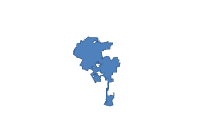

In [77]:
# Item Added From Toolbar
# Title: results_populationvsannualpm_Join_MM | Type: Feature Service | Owner: mohammad-abdul-muneer-mogni.shaik
join_populationvsannual_pm_fl = gis.content.get("00f8a30900de451787ff2a8c42b15748")
join_populationvsannual_pm_fl

In [78]:
#Let’s map our joined layer
populationvsannualpm_map = gis.map('Los Angeles, CA', zoomlevel=9)
populationvsannualpm_map.add_layer(join_populationvsannual_pm_fl)
populationvsannualpm_map

MapView(layout=Layout(height='400px', width='100%'))

## INTERPOLATION OF JOINED POPULATIONVSANNUALPM MAP & ASTHMA DUE TO PM2.5 MAP: USING ASTHMA FIELD

In [79]:
interpolate_asthma = gis.content.get("fd549e39d9cd425f9b8c046d07842f47")
interpolate_asthma

<Item title:"asthma_LA" type:Feature Layer Collection owner:david.marcucci>

<Item title:"results_populationvsannualpm_Join_DM" type:Feature Layer Collection owner:david.marcucci>
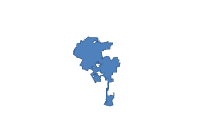

In [80]:
# Item Added From Toolbar
# Title: results_populationvsannualpm_Join_MM | Type: Feature Service | Owner: mohammad-abdul-muneer-mogni.shaik
va_border = gis.content.get("00f8a30900de451787ff2a8c42b15748")
va_border

In [82]:
interpolated_asthma = interpolate_points(interpolate_asthma,field='Asthma', interpolate_option= 5, output_prediction_error=True, classification_type='GeometricInterval', num_classes = 8, bounding_polygon_layer = va_border, output_name= 'interpolated_asthma_DM2')

{"cost": 0.692}


In [83]:
# Item Added From Toolbar
# Title: interpolated_asthma_2 | Type: Feature Service | Owner: mohammad-abdul-muneer-mogni.shaik
interpolated_asthma = gis.content.get("309c8a47a73a400883c039d53aa9b6a9")
interpolated_asthma

<Item title:"interpolated_asthma_DM" type:Feature Layer Collection owner:david.marcucci>

In [84]:
interpolation_map = gis.map('Los Angeles, CA', zoomlevel=9)
interpolation_map.add_layer(interpolated_asthma)
interpolation_map

MapView(layout=Layout(height='400px', width='100%'))

## INTERPOLATION OF PM2.5 DATA AND WILDFIRES: USING PM2.5PERCENTILE FIELD

In [85]:
# Item Added From Toolbar
# Title: annualpm2.5 | Type: File Geodatabase | Owner: mohammad-abdul-muneer-mogni.shaik
asth = gis.content.get("fd549e39d9cd425f9b8c046d07842f47")
asth

<Item title:"asthma_LA" type:Feature Layer Collection owner:david.marcucci>

In [86]:
# Item Added From Toolbar
# Title: cal_fire_2 | Type: Feature Service | Owner: mohammad-abdul-muneer-mogni.shaik
calf = gis.content.get("38f63d782e1947faa7a56c4384da2c77")
calf

<Item title:"cal_fire_2" type:Feature Layer Collection owner:david.marcucci>

In [87]:
interpolated_calf_annual_DM = interpolate_points(asth,field='PM2_5_Pctl', interpolate_option= 5, output_prediction_error=True, classification_type='GeometricInterval', num_classes = 8, bounding_polygon_layer = calf, output_name= 'interpolated_calf_annual_DM2')

{"cost": 0.722}


In [88]:
interpolated_calf_annual_DM

<Item title:"interpolated_calf_annual_DM2" type:Feature Layer Collection owner:david.marcucci>

In [89]:
# Item Added From Toolbar
# Title: interpolated_calf_annual_2 | Type: Feature Service | Owner: mohammad-abdul-muneer-mogni.shaik
interpolated_calf_annual = gis.content.get("5c4f649e3bb94a0b8d2c74d1aba5d886")
interpolated_calf_annual

<Item title:"interpolated_calf_annual_DM" type:Feature Layer Collection owner:david.marcucci>

In [90]:
interpolation_ma = gis.map('Los Angeles, CA', zoomlevel=9)
interpolation_ma.add_layer(interpolated_calf_annual)
interpolation_ma

MapView(layout=Layout(height='400px', width='100%'))

### HOSPITAL DATA:


<Item title:"Hospitals_and_Medical_Centers" type:Feature Layer Collection owner:mohammad-abdul-muneer-mogni.shaik>
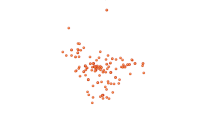

In [91]:
# Item Added From Toolbar
# Title: Hospitals_and_Medical_Centers | Type: Feature Service | Owner: mohammad-abdul-muneer-mogni.shaik
hospital = gis.content.get("983f9ae45c9d46ce89822545c878c842")
hospital

In [92]:
# Extracting the data from the Layer
hospitalLayer = hospital.layers[0]
hospitalLayerDF = pd.DataFrame.spatial.from_layer(hospitalLayer)
hospitalLayerDF

,FID,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,...,link,use_type,latitude,longitude,date_updat,email,dis_status,POINT_X,POINT_Y,SHAPE
0,1,9,211,,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Verdugo Hills Hospital,1812 Verdugo Blvd.,...,http://egis3.lacounty.gov/lms/?p=560,publish,34.204530,-118.216023,2016-01-29,,,6.496353e+06,1.896883e+06,"{""x"": -13159747.54031195, ""y"": 4056298.5246833..."
1,2,11,211,,Health and Mental Health,Hospitals and Medical Centers,Respiratory Hospital,,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,...,http://egis3.lacounty.gov/lms/?p=561,publish,34.075693,-118.248312,2016-01-21,,,6.486475e+06,1.850019e+06,"{""x"": -13163341.837440426, ""y"": 4038970.237345..."
2,3,20,211,,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Glendora Community Hospital,150 W. Route 66,...,http://egis3.lacounty.gov/lms/?p=568,publish,34.127307,-117.865075,2016-01-22,,,6.602504e+06,1.868737e+06,"{""x"": -13120680.093184762, ""y"": 4045909.118269..."
3,4,25,211,,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,Providence Little Company of Mary Medical Center,Providence Little Company Of Mary Medical Cent...,4101 Torrance Blvd.,...,http://egis3.lacounty.gov/lms/?p=569,publish,33.838634,-118.357113,2016-01-27,,,6.453221e+06,1.763848e+06,"{""x"": -13175453.55718023, ""y"": 4007155.0699123..."
4,5,35,211,,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Glendale Memorial Hospital And Health Center,1420 S. Central Ave.,...,http://egis3.lacounty.gov/lms/?p=570,publish,34.128058,-118.257443,2016-01-22,,,6.483758e+06,1.869083e+06,"{""x"": -13164358.341337662, ""y"": 4046010.130088..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,161,71348,,,Health and Mental Health,Hospitals and Medical Centers,,,Southern California Hospital at Culver City,3828 Delmas Ter,...,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016-02-02,,,6.441390e+06,1.831059e+06,"{""x"": -13179887.401400013, ""y"": 4031917.009103..."
161,162,71349,,,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Southern California Hospital at Culver City,3828 Delmas Ter,...,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016-02-02,,,6.441390e+06,1.831059e+06,"{""x"": -13179887.401400013, ""y"": 4031917.009103..."
162,163,71350,,,Health and Mental Health,Hospitals and Medical Centers,Acute Care,,Southern California Hospital at Culver City,3828 Delmas Ter,...,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016-02-02,,,6.441390e+06,1.831059e+06,"{""x"": -13179887.401400013, ""y"": 4031917.009103..."
163,164,71351,,,Health and Mental Health,Hospitals and Medical Centers,,,Southern California Hospital at Hollywood,6245 De Longpre Avenue,...,http://egis3.lacounty.gov/lms/?p=80738,publish,34.096445,-118.325144,2016-02-03,,,6.463232e+06,1.857638e+06,"{""x"": -13171894.773211094, ""y"": 4041759.619096..."


In [93]:
# Exploring the dataset attributs
hospitalLayerDF.columns

Index(['FID', 'OBJECTID', 'source', 'ext_id', 'cat1', 'cat2', 'cat3',
       'org_name', 'Name', 'addrln1', 'addrln2', 'city', 'state', 'hours',
       'phones', 'url', 'info1', 'info2', 'post_id', 'descriptio', 'zip',
       'link', 'use_type', 'latitude', 'longitude', 'date_updat', 'email',
       'dis_status', 'POINT_X', 'POINT_Y', 'SHAPE'],
      dtype='object')

In [94]:
hospitalLayerDF_Filtered_df = hospitalLayerDF.query("cat3 == 'Respiratory Hospital'")
hospitalLayerDF_Filtered_df

,FID,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,...,link,use_type,latitude,longitude,date_updat,email,dis_status,POINT_X,POINT_Y,SHAPE
1,2,11,211,,Health and Mental Health,Hospitals and Medical Centers,Respiratory Hospital,,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,...,http://egis3.lacounty.gov/lms/?p=561,publish,34.075693,-118.248312,2016-01-21,,,6.486475e+06,1.850019e+06,"{""x"": -13163341.837440426, ""y"": 4038970.237345..."
29,30,165,211,,Health and Mental Health,Hospitals and Medical Centers,Respiratory Hospital,,Barlow Respiratory Hospital At Presbyterian In...,12401 Washington Blvd.,...,http://egis3.lacounty.gov/lms/?p=631,publish,33.969794,-118.049360,2016-01-21,,,6.546704e+06,1.811391e+06,"{""x"": -13141194.627699371, ""y"": 4024746.762346..."
31,32,179,211,,Health and Mental Health,Hospitals and Medical Centers,Respiratory Hospital,Barlow Respiratory Hospital,Barlow Hospital At Valley Presbyterian Hospital,15107 Vanowen Blvd.,...,http://egis3.lacounty.gov/lms/?p=636,publish,34.194280,-118.462724,2016-01-21,,,6.421744e+06,1.893405e+06,"{""x"": -13187210.120986883, ""y"": 4054918.981507..."
89,90,1414,211,,Health and Mental Health,Hospitals and Medical Centers,Respiratory Hospital,Centinela Hospital Medical Center,Centinela Hospital Medical Center,555 E. Hardy St.,...,http://egis3.lacounty.gov/lms/?p=1312,publish,33.950783,-118.348257,2016-01-21,,,6.456051e+06,1.804652e+06,"{""x"": -13174467.73399719, ""y"": 4022195.2538241..."


In [95]:
hospitalLayerDF_Filtered_df_FilteredLayer = hospitalLayerDF_Filtered_df.spatial.to_featurelayer(title='hospitals',tags=['cal_fire'])
hospitalLayerDF_Filtered_df_FilteredLayer

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<Item title:"hospitals" type:Feature Layer Collection owner:david.marcucci>

In [96]:
# Item Added From Toolbar
# Title: hospitals | Type: Feature Service | Owner: mohammad-abdul-muneer-mogni.shaik
hospitalLayerDF_Filtered_df_FilteredLayer = gis.content.get("4ffddb50e29a4239a962961578373ad7")
hospitalLayerDF_Filtered_df_FilteredLayer

<Item title:"hospitals" type:Feature Layer Collection owner:david.marcucci>

## ADDING ALL LAYERS IN LOS ANGELES MAP:

In [97]:
map5 = gis.map('Los Angeles, CA', zoomlevel=9)
map5

MapView(layout=Layout(height='400px', width='100%'))

In [98]:
map5.add_layer(interpolated_asthma)
map5.add_layer(interpolated_calf_annual)
map5.add_layer(hospitalLayerDF_Filtered_df_FilteredLayer)

##### Create a Webmap

In [109]:
webmap_properties= {'title': 'LA', 'snippet': 'Health_LA', 'tags':['Los Angeles, CA', 'Asthma']}
map5.save(webmap_properties)

<Item title:"LA" type:Web Map owner:david.marcucci>

## Works Cited

California Air Quality index (AQI) and USA Air Pollution. IQAir. (n.d.). Retrieved December 4, 2022, from https://www.iqair.com/us/usa/california

California Air Resources Board. Inhalable Particulate Matter and Health (PM2.5 and PM10) | California Air Resources Board. (n.d.). Retrieved December 5, 2022, from https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health 

Centers for Disease Control and Prevention. (n.d.). National Environmental Public Health Tracking Network - CDC - Info by location external. Centers for Disease Control and Prevention. Retrieved December 4, 2022, from https://ephtracking.cdc.gov/showInfoByLocationExt/?&FIPS=06037

Chankaew K, Sinitkul R, Manuyakorn W, Roekworachai K, Kamalaporn H. Spatial Estimation of PM2.5 Exposure and its Association with Asthma Exacerbation: A Prospective Study in Thai Children. Ann Glob Health. 2022 Mar 8;88(1):15. doi: 10.5334/aogh.3513. PMID: 35433288; PMCID: PMC8916056.

Environmental Protection Agency. (n.d.). Why Wildfire Smoke is a Health Concern. EPA. Retrieved December 4, 2022, from https://www.epa.gov/wildfire-smoke-course/why-wildfire-smoke-health-concern

McClure, C. D., & Jaffe, D. A. (2018). US particulate matter air quality improves except in wildfire-prone areas. Proceedings of the National Academy of Sciences, 115(31), 7901–7906. https://doi.org/10.1073/pnas.1804353115